<a class="anchor" id="0"></a>
# **Time Series Modeling**


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})


## **Import data**

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/thieu1995/csv-files/main/data/timeseries/univariate/acea-water-prediction/River_Arno.csv")
df.head()

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88


In [4]:
df['Date'] = pd.to_datetime(df.Date, format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8217 non-null   datetime64[ns]
 1   Rainfall_Le_Croci          6026 non-null   float64       
 2   Rainfall_Cavallina         6026 non-null   float64       
 3   Rainfall_S_Agata           6026 non-null   float64       
 4   Rainfall_Mangona           6026 non-null   float64       
 5   Rainfall_S_Piero           6026 non-null   float64       
 6   Rainfall_Vernio            4283 non-null   float64       
 7   Rainfall_Stia              1283 non-null   float64       
 8   Rainfall_Consuma           1283 non-null   float64       
 9   Rainfall_Incisa            4568 non-null   float64       
 10  Rainfall_Montevarchi       1647 non-null   float64       
 11  Rainfall_S_Savino          1283 non-null   float64       
 12  Rainfa

In [5]:
df['year'] = df.Date.dt.year
df['month'] = df.Date.dt.month

In [7]:
def get_df():
    df = pd.read_csv("https://raw.githubusercontent.com/thieu1995/csv-files/main/data/timeseries/univariate/acea-water-prediction/River_Arno.csv")
    df.head()
    # df.columns = ['date','#passengers']
    df['Date'] = pd.to_datetime(df.Date, format='%d/%m/%Y')
    df['day'] = df['Date'].dt.day
    df['year'] = df.Date.dt.year
    df['month'] = df.Date.dt.month
    return df

df = get_df()
df.head()

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano,day,year,month
0,1998-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82,1,1998,1
1,1998-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94,2,1998,1
2,1998-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11,3,1998,1
3,1998-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84,4,1998,1
4,1998-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88,5,1998,1


In [8]:
import pandas as pd

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [9]:
dataset = pd.DataFrame(df['Hydrometry_Nave_di_Rosano'])

In [10]:
data = series_to_supervised(dataset, n_in=3, n_out=1)
print(data)

      var1(t-3)  var1(t-2)  var1(t-1)  var1(t)
3          1.82       1.94       2.11     1.84
4          1.94       2.11       1.84     1.88
5          2.11       1.84       1.88     1.79
6          1.84       1.88       1.79     1.77
7          1.88       1.79       1.77     1.83
...         ...        ...        ...      ...
8212       1.38       1.33       1.35     1.34
8213       1.33       1.35       1.34     1.21
8214       1.35       1.34       1.21     1.30
8215       1.34       1.21       1.30     1.19
8216       1.21       1.30       1.19     1.30

[8142 rows x 4 columns]


In [11]:
X, Y = data[['var1(t-3)', 'var1(t-2)', 'var1(t-1)']], data['var1(t)']
print(X, Y)

      var1(t-3)  var1(t-2)  var1(t-1)
3          1.82       1.94       2.11
4          1.94       2.11       1.84
5          2.11       1.84       1.88
6          1.84       1.88       1.79
7          1.88       1.79       1.77
...         ...        ...        ...
8212       1.38       1.33       1.35
8213       1.33       1.35       1.34
8214       1.35       1.34       1.21
8215       1.34       1.21       1.30
8216       1.21       1.30       1.19

[8142 rows x 3 columns] 3       1.84
4       1.88
5       1.79
6       1.77
7       1.83
        ... 
8212    1.34
8213    1.21
8214    1.30
8215    1.19
8216    1.30
Name: var1(t), Length: 8142, dtype: float64


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import AdaBoostRegressor

# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False, random_state=0)

# Initialize the estimator
estimator = AdaBoostRegressor(n_estimators=500, learning_rate=0.05)

# Fit the data
estimator.fit(X_train, Y_train)

# Make predictions
pred = estimator.predict(X_test)

# Calculate metrics
print(mean_squared_error(Y_test, pred))
print(mean_absolute_percentage_error(Y_test, pred))
print(r2_score(Y_test, pred))

0.13454253078555736
3192064998703.652
0.6335826155405653


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

def draw_true_predict(y_true, y_pred):
    size = len(y_true)
    plt.plot(list(range(size)), y_true, label='real', color='blue')
    plt.plot(list(range(size)), y_pred, label='predicted', color='red')
    plt.legend(loc='best')
    plt.title('Real vs Predicted values')
    plt.show()

def calculate_metrics(y_true, y_pred):
    # Calculate metrics
    MSE = mean_squared_error(Y_test, pred)
    MAPE = mean_absolute_percentage_error(Y_test, pred)
    R2 = r2_score(Y_test, pred)
    print(f"MSE: {MSE}, MAPE: {MAPE}, R2: {R2}")

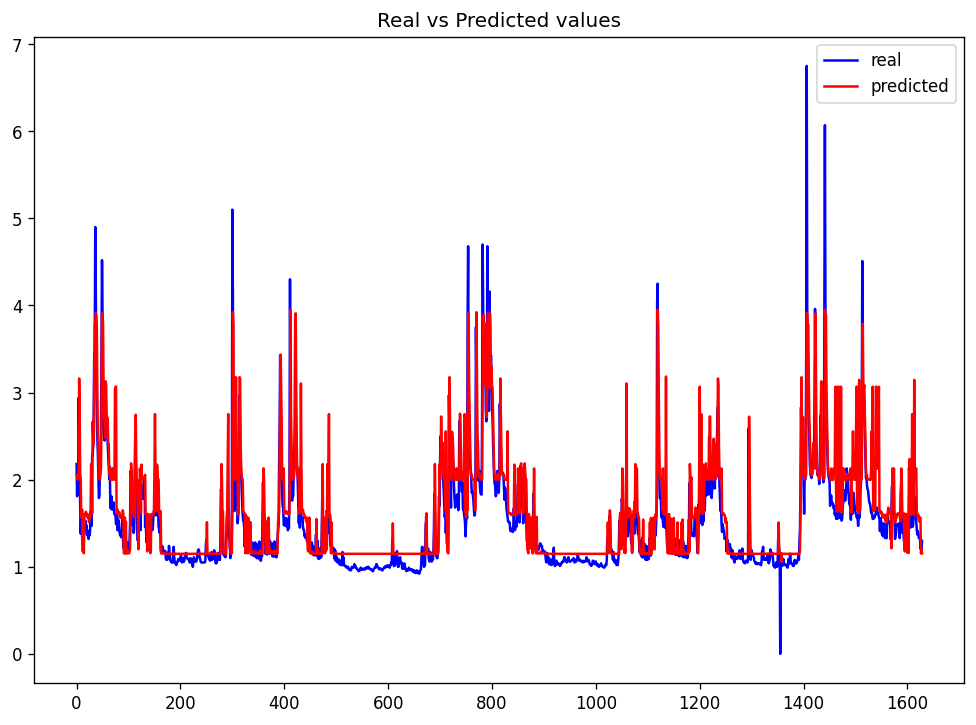

In [14]:
draw_true_predict(Y_test, pred)

MSE: 0.09150127185409147, MAPE: 3197859845905.2124, R2: 0.7508025416815858


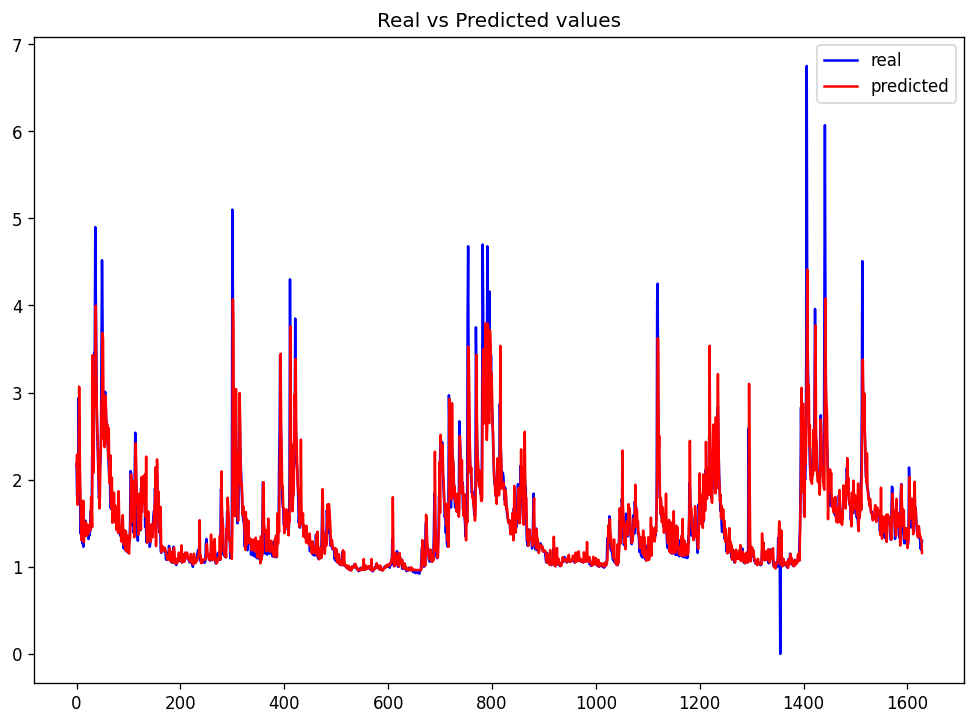

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False, random_state=0)

# Initialize the estimator
estimator = RandomForestRegressor()

# Fit the data
estimator.fit(X_train, Y_train)

# Make predictions
pred = estimator.predict(X_test)

# Calculate metrics
calculate_metrics(Y_test, pred)

draw_true_predict(Y_test, pred)

      var1(t-3)  var1(t-2)  var1(t-1)
3          1.82       1.94       2.11
4          1.94       2.11       1.84
5          2.11       1.84       1.88
6          1.84       1.88       1.79
7          1.88       1.79       1.77
...         ...        ...        ...
8212       1.38       1.33       1.35
8213       1.33       1.35       1.34
8214       1.35       1.34       1.21
8215       1.34       1.21       1.30
8216       1.21       1.30       1.19

[8142 rows x 3 columns] 3       1.84
4       1.88
5       1.79
6       1.77
7       1.83
        ... 
8212    1.34
8213    1.21
8214    1.30
8215    1.19
8216    1.30
Name: var1(t), Length: 8142, dtype: float64


/Users/cngvng/anaconda3/envs/ai-dev/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE: 0.09150127185409147, MAPE: 3197859845905.2124, R2: 0.7508025416815858


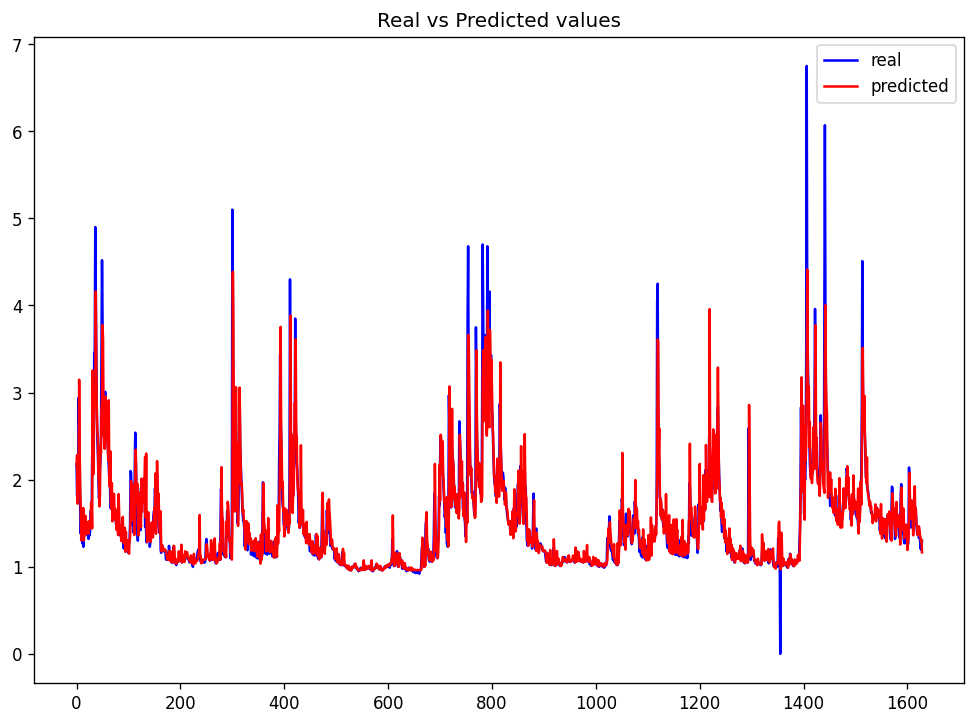

In [16]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, Y = data[['var1(t-3)', 'var1(t-2)', 'var1(t-1)']], data['var1(t)']
print(X, Y)
X = X.values
Y = Y.values

# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False, random_state=0)
Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

scaler_feature = StandardScaler()
scaler_feature.fit(X_train)
X_train_scaled = scaler_feature.transform(X_train)
X_test_scaled = scaler_feature.transform(X_test)

scaler_label = StandardScaler()
scaler_label.fit(Y_train)
Y_train_scaled = scaler_label.transform(Y_train)
Y_test_scaled = scaler_label.transform(Y_test)


# Initialize the estimator
estimator = RandomForestRegressor()

# Fit the data
estimator.fit(X_train_scaled, Y_train_scaled)

# Make predictions
y_pred = estimator.predict(X_test_scaled)
y_pred_unscaled = scaler_label.inverse_transform(np.reshape(y_pred, (-1, 1)))

# Calculate metrics
calculate_metrics(Y_test, y_pred_unscaled)

draw_true_predict(Y_test, y_pred_unscaled)

MSE: 0.2299886316336301, MAPE: 0.8906895704552595, R2: 0.7620946620403444


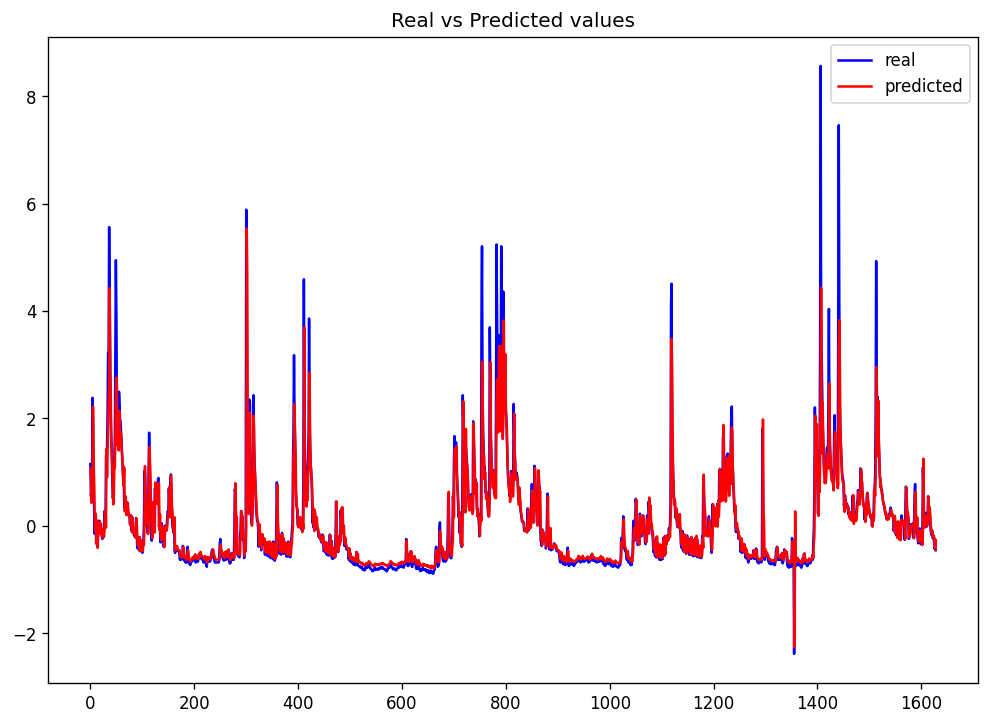

In [17]:
from sklearn.preprocessing import scale
from sklearn.svm import SVR

x = scale(X)
y = scale(Y)

# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, shuffle=False, random_state=0)

# Initialize the estimator
estimator = rfr = SVR(C=10, epsilon=0.1)

# Fit the data
estimator.fit(X_train, Y_train)

# Make predictions
pred = estimator.predict(X_test)

# Calculate metrics
calculate_metrics(Y_test, pred)

draw_true_predict(Y_test, pred)

In [18]:
## Hyper-parameter tuning using GridSearchCV

from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

x = scale(X)
y = scale(Y)

# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, shuffle=False, random_state=0)

# defining parameter range
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'epsilon': [0.1, 0.2, 0.3, 0.5, 1.0],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# defining the gridsearchCV object
grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)

# Fit the data
grid.fit(X_train, Y_train)

# Make predictions
pred = grid.predict(X_test)

# Calculate metrics
calculate_metrics(Y_test, pred)

draw_true_predict(Y_test, pred)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ....C=0.1, epsilon=0.1, kernel=rbf;, score=0.691 total time=   0.6s
[CV 2/5] END ....C=0.1, epsilon=0.1, kernel=rbf;, score=0.778 total time=   0.6s
[CV 3/5] END ....C=0.1, epsilon=0.1, kernel=rbf;, score=0.846 total time=   0.7s
[CV 4/5] END ....C=0.1, epsilon=0.1, kernel=rbf;, score=0.817 total time=   0.6s
[CV 5/5] END ....C=0.1, epsilon=0.1, kernel=rbf;, score=0.711 total time=   0.6s
[CV 1/5] END .C=0.1, epsilon=0.1, kernel=linear;, score=0.690 total time=   1.7s
[CV 2/5] END .C=0.1, epsilon=0.1, kernel=linear;, score=0.769 total time=   0.5s
[CV 3/5] END .C=0.1, epsilon=0.1, kernel=linear;, score=0.868 total time=   0.4s
[CV 4/5] END .C=0.1, epsilon=0.1, kernel=linear;, score=0.849 total time=   0.4s
[CV 5/5] END .C=0.1, epsilon=0.1, kernel=linear;, score=0.743 total time=   0.5s
[CV 1/5] END ..C=0.1, epsilon=0.1, kernel=poly;, score=-0.617 total time=   2.8s
[CV 2/5] END ...C=0.1, epsilon=0.1, kernel=pol

KeyboardInterrupt: 

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, shuffle=False, random_state=0)

# Make pipeline
pipe = make_pipeline(StandardScaler(), SVR(C=10, epsilon=0.2))
pipe.fit(X_train, Y_train)

# Make predictions
pred = pipe.predict(X_test)

# Calculate metrics
calculate_metrics(Y_test, pred)

draw_true_predict(Y_test, pred)

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV


#++++++++++++++++++++++++++++++++++++
#+ create train and test sets
#++++++++++++++++++++++++++++++++++++
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, shuffle=False, random_state=0)


#++++++++++++++++++++++++++++++++
# create the pipeline object
#++++++++++++++++++++++++++++++++
steps = [('scaler', StandardScaler()), ('SVR', SVR())]
pipeline = Pipeline(steps)


#++++++++++++++++++++++++++++++++++++++
#+ create the hyperparameter space
#++++++++++++++++++++++++++++++++++++++
parameteres = {
    'SVR__C': [0.1, 1, 10, 100, 1000],
    'SVR__epsilon': [0.1, 0.2, 0.3, 0.5, 1.0],
    'SVR__kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

#++++++++++++++++++++++++++++++
#+ Grid Search Cross Validation
#++++++++++++++++++++++++++++++
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5, verbose=3)

# Fit the data
grid.fit(X_train, Y_train)

# get the best parameters
print(grid.best_params_)

# Make predictions
pred = grid.predict(X_test)

# Calculate metrics
calculate_metrics(Y_test, pred)

draw_true_predict(Y_test, pred)